In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # 경고 무시하기

In [127]:
df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/data/mobile_phone.csv')
df.head()

# 이렇게 친절한 데이터는 사실상 없음...

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [128]:
df.info() # create_date가 문자열 형태로 되어 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


데이터에서 날짜 중 **'월'**만 뽑아오려면 ?

In [129]:
df['create_date'][0].split('-')[1] # 1

'03'

In [130]:
df.iloc[:,0][0][5:7] # 2

'03'

데이터에서 날짜 중 **'연도'**와 **'월'**만 뽑아오려면 ? --> **apply**

In [131]:
df['YearMonth'] = df['create_date'].apply(lambda x : x[:7])

In [132]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,YearMonth
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


### 연도별, 일별 거래 횟수

In [133]:
df_yearmonth = df['YearMonth'].value_counts()
df_yearmonth.head()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
Name: YearMonth, dtype: int64

### 연도별, 일별 거래 그래프

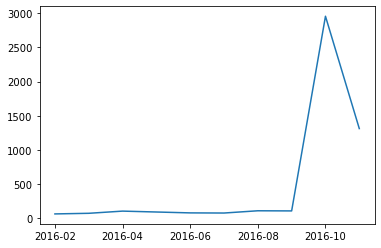

In [134]:
df_yearmonth.sort_index(ascending=True).plot()
plt.show()
# 2016년에 거래량이 폭발적임

### 변화가 있는 특정 시점의 일별 거래량

In [135]:
df['YearMonthDate'] = df['create_date'].apply(lambda x : x[0:10])
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,YearMonth,YearMonthDate
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03,2017-03-19
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10,2016-10-26
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10,2016-10-25
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03,2017-03-23
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04,2016-04-11


In [136]:
df_yearmonthdate = df['YearMonthDate'].value_counts()
df_yearmonthdate.head()

2016-10-24    564
2017-03-24    272
2016-10-21    250
2017-03-23    234
2016-10-22    226
Name: YearMonthDate, dtype: int64

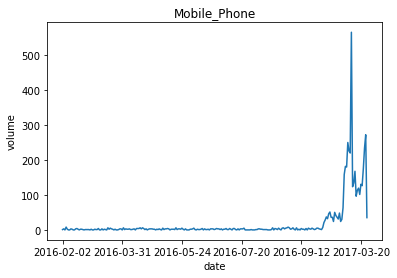

In [137]:
df_yearmonthdate.sort_index(ascending=True).plot()
plt.title('Mobile_Phone')
plt.xlabel('date')
plt.ylabel('volume')
plt.show()

### 일별로 다 그리기 (잘려 나옴) ???

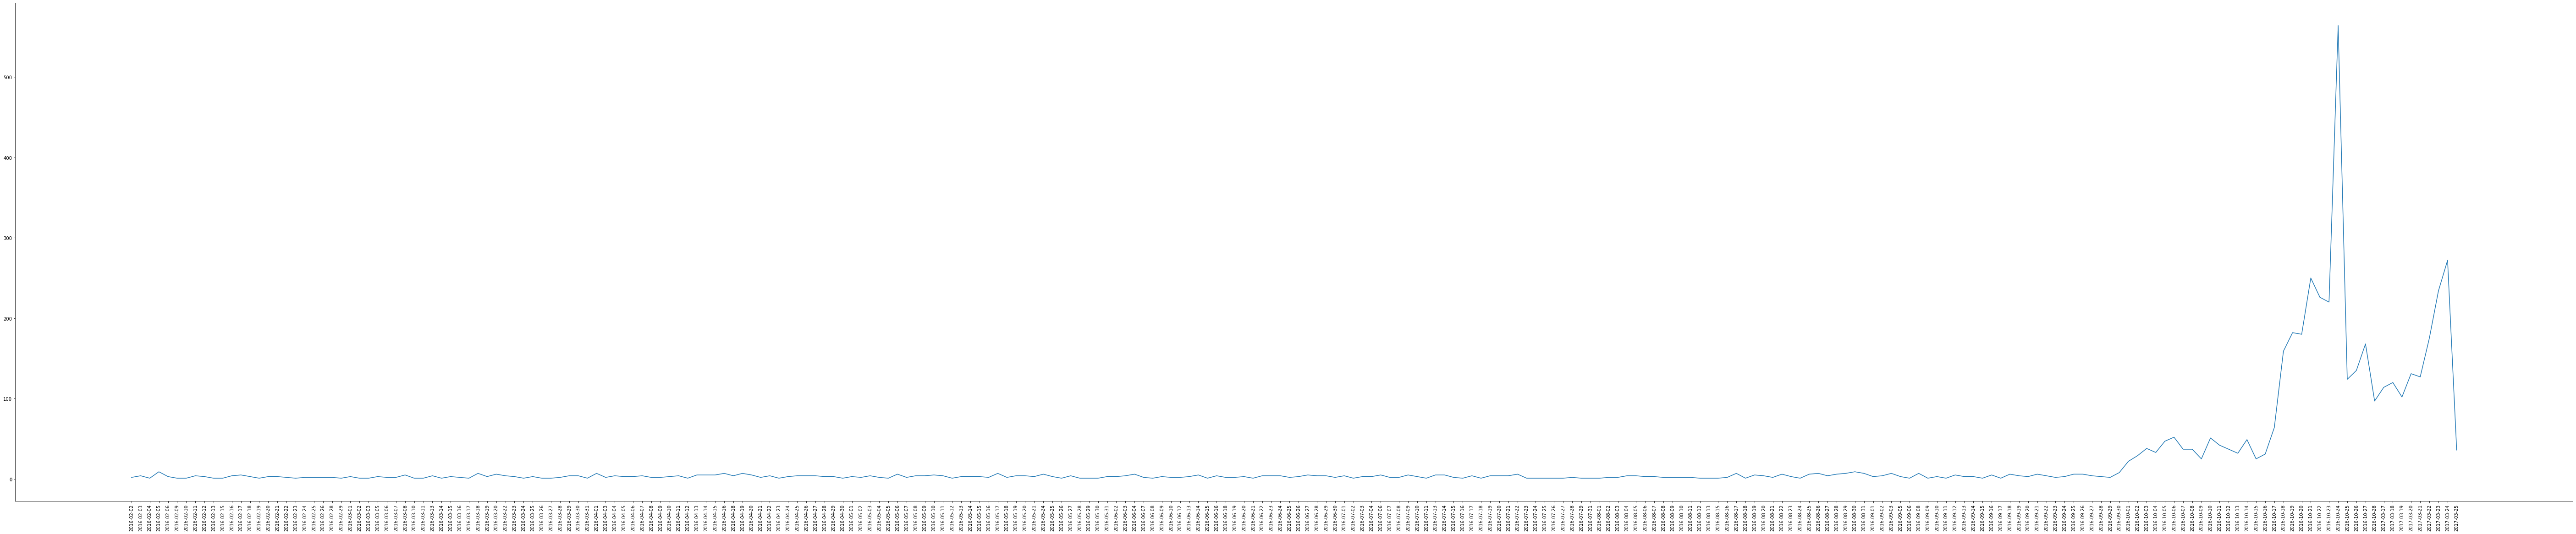

In [138]:
df_yearmonthdate = df_yearmonthdate.sort_index(ascending=True) # 변수로 받아줘야 제대로 그려짐

plt.figure(figsize=(100,20))
plt.plot(df_yearmonthdate.index, df_yearmonthdate.values)
plt.xticks(rotation=90)
plt.show()

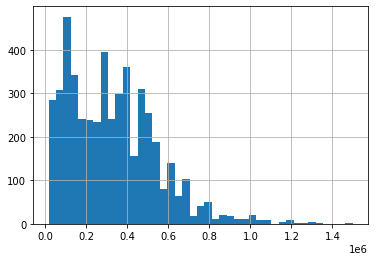

In [139]:
df['price'].hist(bins='auto') # 자동 간격 설정
plt.show()
# 대부분 60만원 안팍으로 거래가 이루어짐

In [140]:
df['price'].head()

0    550000.0
1    380000.0
2    300000.0
3    290000.0
4    280000.0
Name: price, dtype: float64

In [141]:
df['phone_model'].values

array(['iphone 6 64gb', 'galaxy s6 edge 32gb', 'galaxy s6 32gb', ...,
       'iphone 7 256gb', 'iphone 7 plus 256gb', 'iphone 7 128gb'],
      dtype=object)

### 모델별 가격 보기

In [142]:
df_model_price = df.groupby('phone_model')['price'].mean()

### 모델별 거래량 그래프

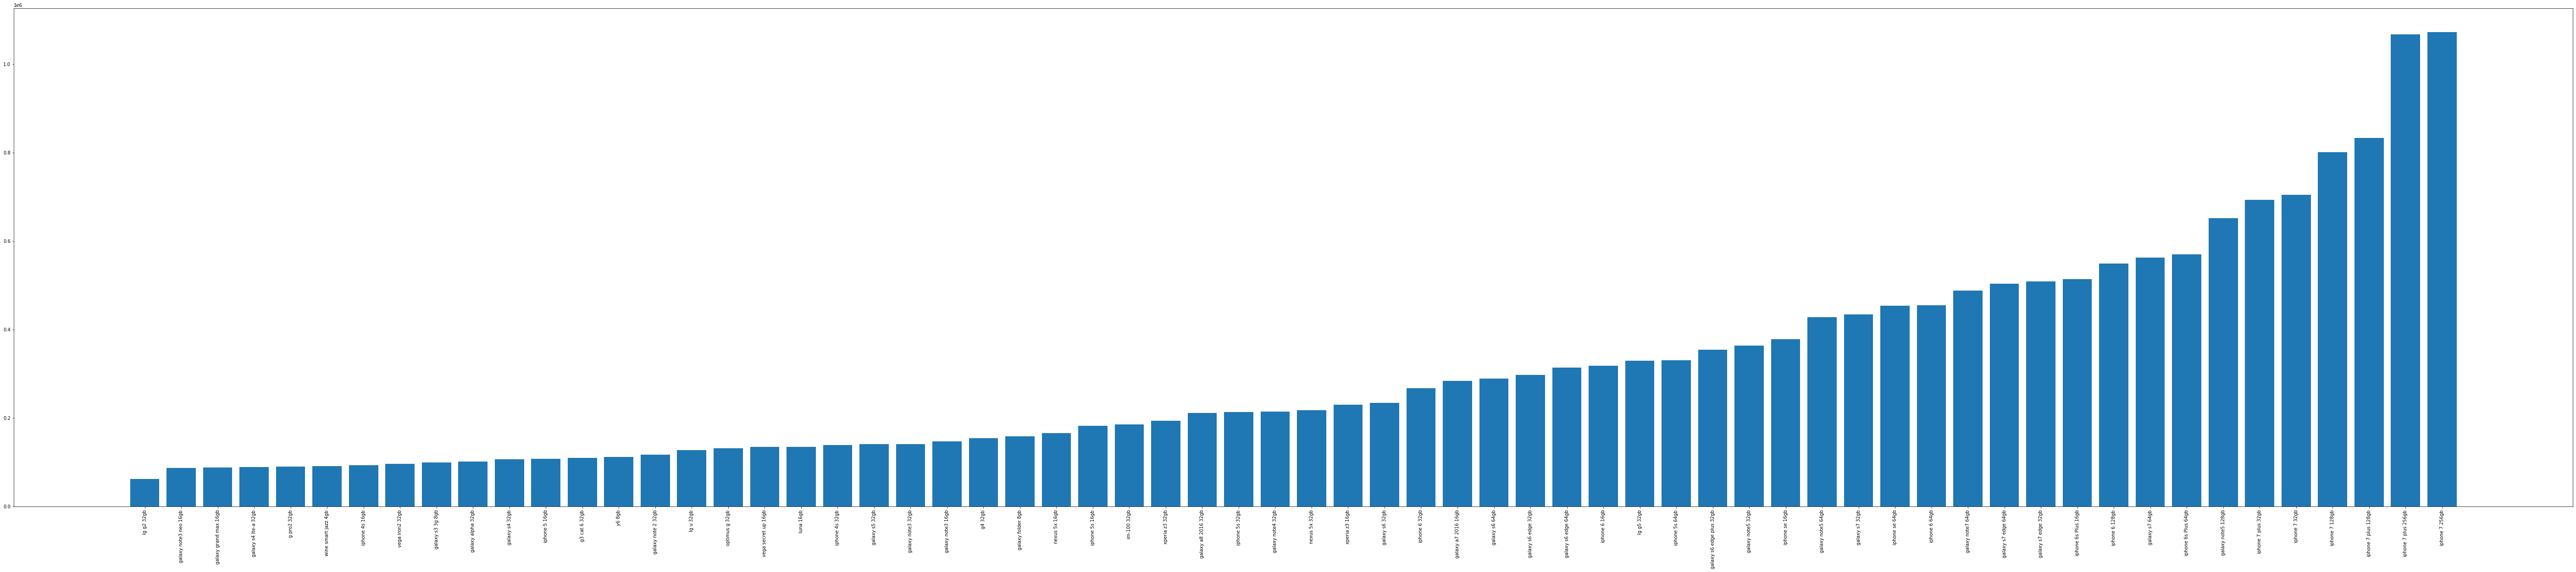

In [143]:
plt.figure(figsize=(100,20))
df_model_price = df_model_price.sort_values()
plt.bar(df_model_price.index, df_model_price.values)
plt.xticks(rotation=90)
plt.show()

### 모델별 가격 평균 & 표준편차 ?

#### 모든 피처들의 상관관계
#### 출고가와 판매가 사이의 상관관계...클러스터
#### 모델별 거래 데이터...box plot
#### 가격 예측...Random Forest
#### 중요한 Feature 탐색